<a href="https://colab.research.google.com/github/lkh9908/COMP-401/blob/master/anime_rating_predict_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [424]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset and preprocessing by deleting all rows with missing data

In [425]:
dataset = pd.read_csv('anime.csv')

In [426]:
print(len(dataset))
print(dataset.iloc[:,3])

12294
0        Movie
1           TV
2           TV
3           TV
4           TV
         ...  
12289      OVA
12290      OVA
12291      OVA
12292      OVA
12293    Movie
Name: type, Length: 12294, dtype: object


In [427]:
# There are still more than 10000 data after deleting all rows with missing data
dropIndex = []
for i in range(len(dataset)):
  if dataset.iloc[i,4] == 'Unknown' or pd.isna(dataset.iloc[i,5]) or dataset.iloc[i,3] == 'Music' or dataset.iloc[i,3] == 'Movie':
    dropIndex.append(i)

dataset = dataset.drop(dropIndex)

print(dropIndex)



[0, 8, 11, 15, 18, 24, 25, 33, 35, 37, 45, 55, 59, 60, 63, 65, 70, 71, 74, 77, 81, 89, 90, 102, 107, 115, 117, 129, 130, 132, 136, 137, 143, 152, 163, 165, 169, 170, 174, 186, 187, 189, 191, 192, 194, 195, 198, 203, 205, 208, 209, 212, 213, 217, 225, 227, 233, 239, 244, 247, 252, 253, 265, 274, 283, 285, 292, 293, 294, 296, 297, 307, 311, 312, 327, 332, 336, 340, 344, 345, 350, 354, 358, 362, 365, 375, 378, 379, 383, 385, 389, 393, 399, 407, 408, 411, 415, 419, 422, 429, 441, 453, 460, 467, 471, 472, 477, 480, 484, 486, 487, 496, 505, 506, 521, 524, 530, 533, 535, 536, 542, 544, 545, 548, 550, 562, 567, 570, 573, 596, 601, 603, 605, 606, 607, 609, 611, 614, 615, 623, 624, 625, 630, 639, 640, 646, 648, 652, 654, 657, 661, 662, 664, 670, 673, 681, 682, 692, 694, 697, 700, 704, 714, 718, 719, 721, 726, 728, 732, 737, 743, 745, 747, 773, 774, 779, 783, 784, 791, 798, 799, 800, 809, 810, 818, 827, 831, 834, 835, 840, 851, 860, 863, 864, 867, 871, 879, 880, 881, 884, 888, 894, 903, 911, 914,

In [428]:
genres = dataset.iloc[:, 2].values
num_genres = [0 for i in range(len(dataset))] 
for i in range(len(dataset)):
  curlist = str(genres[i])
  if curlist == '':
    continue
  else:
    genre_list = curlist.split(',')
    num_genres[i] = len(genre_list)


In [429]:
X1 = np.stack((dataset.iloc[:, -1].values, num_genres), axis = 1)
X = np.concatenate((dataset.iloc[:, 3:5].values, X1), axis = 1)
X = X[:,1:]

y = dataset.iloc[:, 5].values

In [430]:
print(X)
print(len(X))
# number of episodes, people in group, number of genres included

[['64' 793665 7]
 ['51' 114262 7]
 ['24' 673572 2]
 ...
 ['1' 183 1]
 ['4' 219 1]
 ['1' 175 1]]
9093


In [431]:
print(y)
print(len(y))

[9.26 9.25 9.17 ... 4.28 4.88 4.98]
9093


## Incode the column containing categorical data (Part not using)
## OVA or Movie

In [389]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [391]:
print(X[0])
print(len(X))
print(len(X[0]))
print(len(y))

[1.0 0.0 0.0 0.0 1.0 '64' 793665 7]
9093
8
9093


## Splitting the dataset into the Training set and Test set

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling (Standardization)

> 缩进块



In [511]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [513]:
print(X_train)

[[-0.28 -0.34 -0.04]
 [-0.24 -0.35 -0.64]
 [-0.11 -0.35 -0.04]
 ...
 [ 0.2  -0.31  1.16]
 [-0.28  0.03 -0.04]
 [-0.07  0.86  0.56]]


In [514]:
print(X_test)

[[ 1.24 -0.09 -0.64]
 [-0.05 -0.35 -1.24]
 [ 0.2   1.31  0.56]
 ...
 [ 0.69 -0.35 -0.04]
 [-0.07  1.37 -0.04]
 [-0.05  5.46  3.55]]


## Training the Multiple Linear Regression model on the Training set

In [515]:
from sklearn.linear_model import LinearRegression
rMult = LinearRegression()
rMult.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [516]:
print(rMult.coef_)
print(rMult.intercept_)

[0.05 0.29 0.29]
6.574542205114105


## Predicting the Test set results for Multilinear Regression Model

In [520]:
y_pred1 = rMult.predict(X_test)
np.set_printoptions(precision=2)

result1 = np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1)
print(result1)

#pd.DataFrame(result).to_csv("result.csv")

[[6.43 8.22]
 [6.12 5.36]
 [7.13 8.33]
 ...
 [6.5  7.13]
 [6.96 7.21]
 [9.19 7.62]]


In [521]:
MSE1 = sum((y_test - y_pred1) * (y_test - y_pred1)) / len(y_test)

In [522]:
print(MSE1)

0.687700174161458


## Training the Random Forest model on the Training set

In [523]:
from sklearn.ensemble import RandomForestRegressor
mses = []
for i in range(100, 1000, 100):

  # try different input of n_estimators
  rForest = RandomForestRegressor(n_estimators = i, oob_score = True)
  rForest.fit(X_train, y_train)
  
  y_pred2 = rForest.predict(X_test)
  np.set_printoptions(precision=2)

  result2 = np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1)
  print(result2)
  MSE2 = sum((y_test - y_pred2) * (y_test - y_pred1)) / len(y_test)
  mses.append(MSE2)

[[7.45 8.22]
 [5.31 5.36]
 [8.08 8.33]
 ...
 [6.84 7.13]
 [7.42 7.21]
 [7.93 7.62]]
[[7.44 8.22]
 [5.29 5.36]
 [8.1  8.33]
 ...
 [6.84 7.13]
 [7.48 7.21]
 [7.96 7.62]]
[[7.5  8.22]
 [5.35 5.36]
 [8.07 8.33]
 ...
 [6.84 7.13]
 [7.46 7.21]
 [7.92 7.62]]
[[7.4  8.22]
 [5.3  5.36]
 [8.08 8.33]
 ...
 [6.83 7.13]
 [7.43 7.21]
 [7.96 7.62]]
[[7.45 8.22]
 [5.34 5.36]
 [8.08 8.33]
 ...
 [6.82 7.13]
 [7.42 7.21]
 [7.93 7.62]]
[[7.41 8.22]
 [5.3  5.36]
 [8.08 8.33]
 ...
 [6.81 7.13]
 [7.47 7.21]
 [7.94 7.62]]
[[7.44 8.22]
 [5.3  5.36]
 [8.09 8.33]
 ...
 [6.81 7.13]
 [7.48 7.21]
 [7.95 7.62]]
[[7.44 8.22]
 [5.33 5.36]
 [8.09 8.33]
 ...
 [6.81 7.13]
 [7.49 7.21]
 [7.94 7.62]]
[[7.41 8.22]
 [5.32 5.36]
 [8.09 8.33]
 ...
 [6.81 7.13]
 [7.5  7.21]
 [7.97 7.62]]


In [524]:
print(mses)

[0.4543361128075778, 0.45494668758076734, 0.45276460899163146, 0.4539561041392732, 0.4533560701637812, 0.4543235848975959, 0.452920689705827, 0.45264589461594096, 0.45313107069233666]


## Visualize MSEs for different numbers of trees in the forest

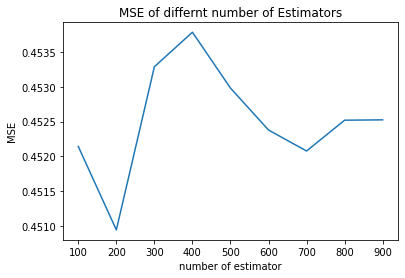

In [507]:
import matplotlib.pyplot as plt
  
# x axis values
x = range(100, 1000, 100)
# corresponding y axis values
y = mses

# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('number of estimator')
# naming the y axis
plt.ylabel('MSE')
  
# giving a title to my graph
plt.title('MSE of differnt number of Estimators')
  
# function to show the plot
plt.show()

In [497]:
print(MSE1)
print(MSE2)

0.687700174161446
0.4530613716957906
